# Install library to read Relian .star files
We're using mrcz because it was pip installable (meaning it was easy to install):
https://python-mrcz.readthedocs.io/index.html

if it's not installed, type the following in a jupyter notebook cell:
```python
%pip install mrcz
```

In [1]:
import mrcz.ReliablePy as mrp

In [2]:
# create data object
rln = mrp.ReliablePy()

In [12]:
#load in files
# Wildcards can be loaded
rln.load( 'gctf-example/17may27a_L33_1d_00016gr_00125sq_v01_00007hln_00005enn-a_local.star')
    

DEBUG: lookup = {1: b'MicrographName', 2: b'CoordinateX', 3: b'CoordinateY', 4: b'Voltage', 5: b'DefocusU', 6: b'DefocusV', 7: b'DefocusAngle', 8: b'SphericalAberration', 9: b'DetectorPixelSize', 10: b'CtfFigureOfMerit', 11: b'Magnification', 12: b'AmplitudeContrast', 13: b'AutopickFigureOfMerit'}


In [13]:
#see what data is available - the file gets loaded in as a dictionary of dictionaries
# b' means data_ is a binary string
rln.star.keys()

odict_keys([b'data_'])

In [14]:
#lets see what fields we have for the relion style
rln.star[b'data_'].keys()

odict_keys([b'MicrographName', b'CoordinateX', b'CoordinateY', b'Voltage', b'DefocusU', b'DefocusV', b'DefocusAngle', b'SphericalAberration', b'DetectorPixelSize', b'CtfFigureOfMerit', b'Magnification', b'AmplitudeContrast', b'AutopickFigureOfMerit'])

In [15]:
#convert the star file to a spreadsheet
#can be done directly since it's an ordered dictionary of ordered dictionaries
import pandas as pd
dfstar = pd.DataFrame(rln.star[b'data_'])

In [16]:
#let's look at that spreadsheet
dfstar.head()

,b'MicrographName',b'CoordinateX',b'CoordinateY',b'Voltage',b'DefocusU',b'DefocusV',b'DefocusAngle',b'SphericalAberration',b'DetectorPixelSize',b'CtfFigureOfMerit',b'Magnification',b'AmplitudeContrast',b'AutopickFigureOfMerit'
0,b'aligned/17may27a_L33_1d_00016gr_00125sq_v01_...,2336.0,336.0,300.0,17178.685547,19613.064453,5.996486,2.7,5.0,0.010898,45454.542969,0.001,0.824345
1,b'aligned/17may27a_L33_1d_00016gr_00125sq_v01_...,3116.0,228.0,300.0,17204.728516,19639.107422,5.996486,2.7,5.0,0.013667,45454.542969,0.001,0.655404
2,b'aligned/17may27a_L33_1d_00016gr_00125sq_v01_...,724.0,496.0,300.0,17467.830078,19902.208984,5.996486,2.7,5.0,0.004492,45454.542969,0.001,0.214542
3,b'aligned/17may27a_L33_1d_00016gr_00125sq_v01_...,1016.0,540.0,300.0,17555.066406,19989.445312,5.996486,2.7,5.0,0.004144,45454.542969,0.001,0.572232
4,b'aligned/17may27a_L33_1d_00016gr_00125sq_v01_...,2752.0,528.0,300.0,16902.119141,19336.498047,5.996486,2.7,5.0,0.012169,45454.542969,0.001,0.690324


In [17]:
# get the string version of all the column names
cn2str = dict([(cn, cn.decode('utf-8'))for cn in dfstar.columns])
cn2str

{b'MicrographName': 'MicrographName',
 b'CoordinateX': 'CoordinateX',
 b'CoordinateY': 'CoordinateY',
 b'Voltage': 'Voltage',
 b'DefocusU': 'DefocusU',
 b'DefocusV': 'DefocusV',
 b'DefocusAngle': 'DefocusAngle',
 b'SphericalAberration': 'SphericalAberration',
 b'DetectorPixelSize': 'DetectorPixelSize',
 b'CtfFigureOfMerit': 'CtfFigureOfMerit',
 b'Magnification': 'Magnification',
 b'AmplitudeContrast': 'AmplitudeContrast',
 b'AutopickFigureOfMerit': 'AutopickFigureOfMerit'}

In [18]:
#Let's rename those columns
dfstar = dfstar.rename(columns=cn2str)
dfstar.head()

,MicrographName,CoordinateX,CoordinateY,Voltage,DefocusU,DefocusV,DefocusAngle,SphericalAberration,DetectorPixelSize,CtfFigureOfMerit,Magnification,AmplitudeContrast,AutopickFigureOfMerit
0,b'aligned/17may27a_L33_1d_00016gr_00125sq_v01_...,2336.0,336.0,300.0,17178.685547,19613.064453,5.996486,2.7,5.0,0.010898,45454.542969,0.001,0.824345
1,b'aligned/17may27a_L33_1d_00016gr_00125sq_v01_...,3116.0,228.0,300.0,17204.728516,19639.107422,5.996486,2.7,5.0,0.013667,45454.542969,0.001,0.655404
2,b'aligned/17may27a_L33_1d_00016gr_00125sq_v01_...,724.0,496.0,300.0,17467.830078,19902.208984,5.996486,2.7,5.0,0.004492,45454.542969,0.001,0.214542
3,b'aligned/17may27a_L33_1d_00016gr_00125sq_v01_...,1016.0,540.0,300.0,17555.066406,19989.445312,5.996486,2.7,5.0,0.004144,45454.542969,0.001,0.572232
4,b'aligned/17may27a_L33_1d_00016gr_00125sq_v01_...,2752.0,528.0,300.0,16902.119141,19336.498047,5.996486,2.7,5.0,0.012169,45454.542969,0.001,0.690324


# Recreate Figures in Excel sheet
we're first checking if we're reading the files in correctly by trying to recreate the images in 17may27a_L33_1d_00016gr_00125sq_v01_00007hln_00005enn_cs.xlsx*

Note that the colors are different, so we're focusing on getting the same grouped striping effect. 

### Create colormappings
In excel, the A-K groupings were generated by taking the minimum and maximum of the data and 10 equally spaced steps between the minium and maximum. In Python, the numpy linspace function will give that spacing.

In [19]:
import numpy as np
binU = np.linspace(dfstar['DefocusU'].min(), dfstar['DefocusU'].max(), 10)
binV = np.linspace(dfstar['DefocusV'].min(), dfstar['DefocusV'].max(), 10)
binU, binV

(array([16204.873047  , 16374.06184911, 16543.25065122, 16712.43945333,
        16881.62825544, 17050.81705756, 17220.00585967, 17389.19466178,
        17558.38346389, 17727.572266  ]),
 array([18639.251953  , 18808.44075511, 18977.62955722, 19146.81835933,
        19316.00716144, 19485.19596356, 19654.38476567, 19823.57356778,
        19992.76236989, 20161.951172  ]))

Now we can use the BoundaryNorm from matplotlib to assign every value in a given bin to one color, every value in the next bin to another color, etc. The colormap is the list of colors we're going to use for the assignment

In [20]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
cmap = plt.get_cmap('jet_r') #these are the colors
normU = mcolors.BoundaryNorm(binU, cmap.N) 
normV = mcolors.BoundaryNorm(binV, cmap.N)

Here we tell scatter how to make the plots. We use the data keyword argument and pass in the dataframe so that we can identify the columns directly. We're going to color based on the value in the Defocus column, but choose which color based on the bin it's placed into using the normalization we set above. The scheme is:

`cmap(norm(value))->color`

A simple version is if I have 
* colormap of 3 colors: `[red, green, blue]`
* boundary norm of: `[1, 5, 10, 15]`

So given:
* value = 3: that's in the 1-5 bin, so it gets colored red
* value = 12: that's in the 10-15 bin so it gets colored blue

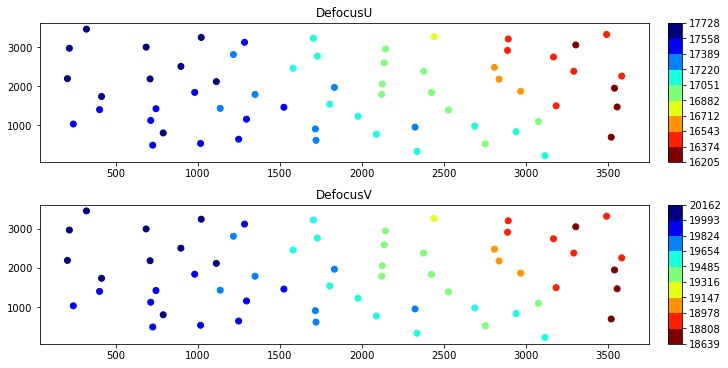

In [21]:
%matplotlib inline 
import matplotlib.pyplot as plt #plotting library
# constrained_layout is to cleanup spacing between plots, 
# _= is to supress print statements
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,5), constrained_layout=True)
_ = ax1.set_title("DefocusU")
#using the data keyword argument, we can just identify the columns
im1 = ax1.scatter('CoordinateX', 'CoordinateY', c='DefocusU', cmap=cmap, norm=normU, data =dfstar)
_ = fig.colorbar(im1, ax=ax1)
_ = ax2.set_title("DefocusV")
im2 = ax2.scatter('CoordinateX', 'CoordinateY', c='DefocusV', cmap=cmap, norm=normV, data=dfstar)
_ = fig.colorbar(im2, ax=ax2)